<a href="https://colab.research.google.com/github/jpdicarvalho/Modelos-Estatisticos-Preditivos/blob/main/Interpola%C3%A7%C3%A3o_Spline_Previs%C3%A3o_para_o_ano_de_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

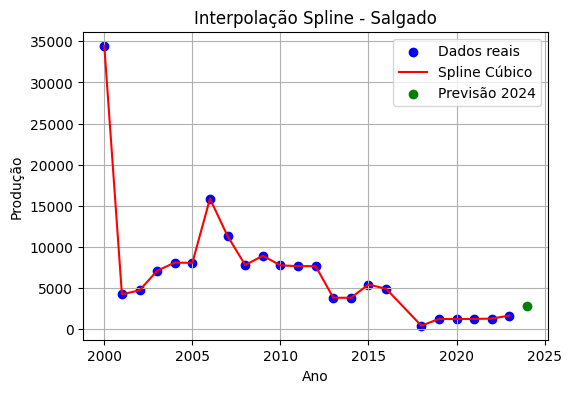

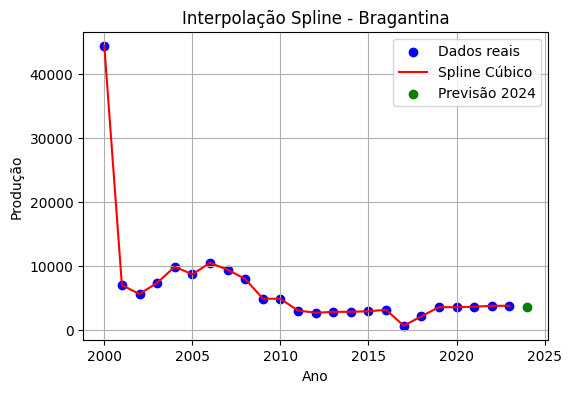

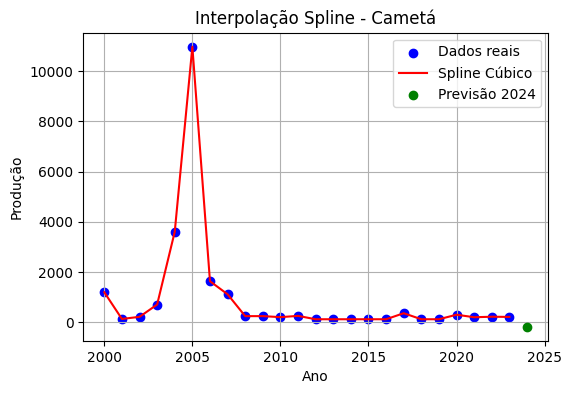

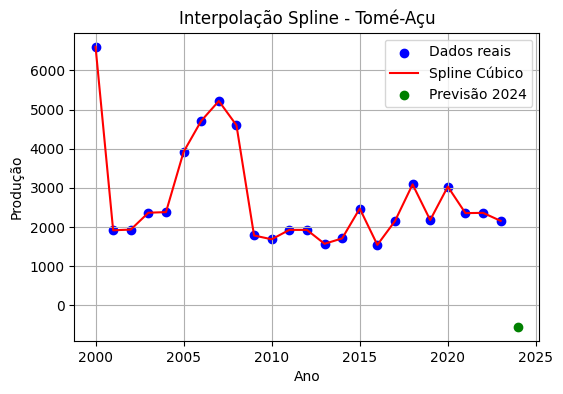

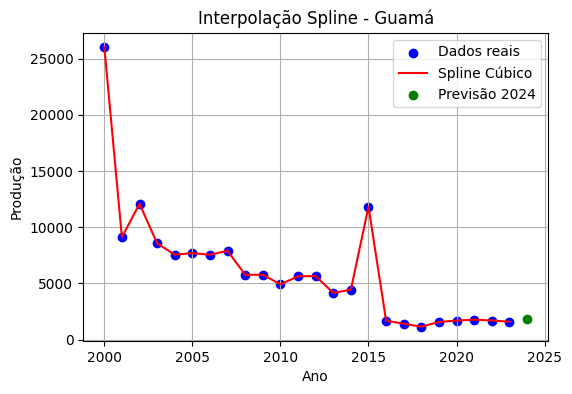

       Região           MAE           MSE          RMSE  \
0     Salgado  9.193805e-13  3.117662e-24  1.765690e-12   
1  Bragantina  7.389644e-13  2.955447e-24  1.719141e-12   
2      Cametá  2.741511e-13  6.114577e-25  7.819576e-13   
3    Tomé-Açu  3.126388e-13  2.391069e-25  4.889856e-13   
4       Guamá  9.379164e-13  2.699108e-24  1.642896e-12   

  Produção Estimada em 2024  
0         2843.211287701778  
1        3655.0208913011047  
2       -177.61751754092722  
3        -551.8663699204508  
4        1795.5837777672455  


,Região,MAE,MSE,RMSE,Produção Estimada em 2024
0,Salgado,9.193805e-13,3.117662e-24,1.765690e-12,2843.211287701778
1,Bragantina,7.389644e-13,2.955447e-24,1.719141e-12,3655.0208913011047
2,Cametá,2.741511e-13,6.114577e-25,7.819576e-13,-177.61751754092722
3,Tomé-Açu,3.126388e-13,2.391069e-25,4.889856e-13,-551.8663699204508
4,Guamá,9.379164e-13,2.699108e-24,1.642896e-12,1795.5837777672455


In [1]:
# Recarregar bibliotecas após a revisão dos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Dados revisados para análise
data = {
    "Year": list(range(2000, 2024)),  # Agora o intervalo é de 2000 a 2023
    "Salgado": [34464, 4254, 4724, 7114, 8102, 8071, 15875, 11323, 7807, 8931, 7766, 7672, 7672, 3828, 3828, 5433, 4926, None, 430, 1250, 1250, 1250, 1300, 1668],
    "Bragantina": [44440, 7031, 5646, 7394, 9906, 8728, 10512, 9448, 8003, 4943, 4879, 3071, 2717, 2868, 2868, 2955, 3177, 695, 2163, 3600, 3581, 3669, 3803, 3816],
    "Cametá": [1195, 132, 216, 705, 3600, 10969, 1634, 1114, 244, 244, 204, 254, 120, 120, 120, 120, 120, 360, 120, 120, 300, 200, 220, 213],
    "Tomé-Açu": [6608, 1914, 1932, 2363, 2379, 3920, 4712, 5220, 4601, 1781, 1684, 1924, 1924, 1569, 1706, 2471, 1541, 2150, 3088, 2176, 3031, 2353, 2360, 2155],
    "Guamá": [26052, 9103, 12086, 8562, 7551, 7692, 7554, 7893, 5761, 5771, 4916, 5629, 5652, 4152, 4440, 11820, 1682, 1410, 1144, 1572, 1687, 1779, 1697, 1592]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Lista de regiões para previsão de 2024
regions = ["Salgado", "Bragantina", "Cametá", "Tomé-Açu", "Guamá"]

# Função para aplicar interpolação Spline para previsão de 2024
def train_and_evaluate_spline_model(data, regions):
    results = []

    for region in regions:
        region_data = np.array(data[region], dtype=float)  # Garantir tipo float

        # Remover valores nulos para treinamento
        valid_indices = ~np.isnan(region_data)
        years_valid = np.array(data["Year"])[valid_indices]
        values_valid = region_data[valid_indices]

        # Ajustar o modelo Spline cúbico
        spline_model = UnivariateSpline(years_valid, values_valid, k=3, s=0)  # k=3 indica cúbico

        # Previsão para 2024
        future_prediction = spline_model(2024)

        # Previsão para os anos de teste
        y_pred = spline_model(years_valid)

        # Cálculo das métricas
        mae = mean_absolute_error(values_valid, y_pred)
        mse = mean_squared_error(values_valid, y_pred)
        rmse = np.sqrt(mse)

        # Armazenar os resultados
        results.append({
            "Região": region,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "Produção Estimada em 2024": future_prediction
        })

        # Gráfico para a região
        plt.figure(figsize=(6, 4))
        plt.scatter(years_valid, values_valid, color="blue", label="Dados reais")
        plt.plot(years_valid, y_pred, color="red", label="Spline Cúbico")
        plt.scatter(2024, future_prediction, color="green", label="Previsão 2024", zorder=6)
        plt.title(f"Interpolação Spline - {region}")
        plt.xlabel("Ano")
        plt.ylabel("Produção")
        plt.legend()
        plt.grid()
        plt.show()

    return pd.DataFrame(results)

# Executar modelo com Interpolação Spline para 2024
results_spline_2024 = train_and_evaluate_spline_model(data, regions)

# Exibir tabela com previsões e métricas
print(results_spline_2024)

# Se estiver rodando no Jupyter Notebook ou Colab, use display() para melhor visualização
from IPython.display import display
display(results_spline_2024)